# Using matplotlib to plot over existing Figures

Shortly before Christmas a paper by Nathalia Cibirka and colleagues appeared as [arXiv:1612.06871](https://arxiv.org/abs/1612.06871) in which she studies the concentration of galaxy clusters using weak lensing. This topic is very close to my research interests and I immediately skimmed through the paper. The primary question in my mind was whether their results are compatible with an upturn in concentration at high claimed for example by the popular mass-concentration relation of [Diemer & Kravtsov (2015, DK15)](https://arxiv.org/abs/1407.4730).

It turns out, the DK15 relation is not included in the Cibirka+16 paper. So I decided to quickly overplot it myself on their data. The ability to do so using just their figure surprised some of my colleagues. This blog post shows how and puts it squarely at the intersection of galaxy cluster physics and matplotlib examples, which should ensure that the interested audience is really small.

We start by downloading the source package of the paper from [arXiv](https://arxiv.org/format/1701.02734v1). Inside we find a jpg file for their Figure 12. ![Figure 12](data/compare_simul_photoz.jpg)

We want to add the DK15 mass-concentration relation to this plot without having access to their MC chains or recomputing the M-c relations already present. Let's first start by computing the DK15 relation. Fortunately Benedikt Diemer published his [COLOSSUS](http://www.benediktdiemer.com/code/) code ([Diemer 2015](http://adsabs.harvard.edu/abs/2015ascl.soft01016D)) so we can just use this.

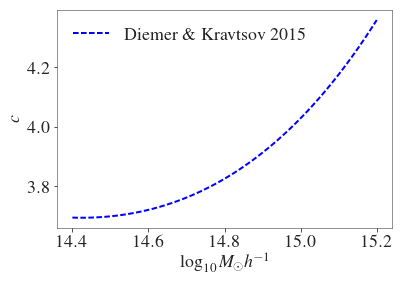

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from colossus.cosmology import cosmology
from colossus.halo import concentration
params = {'flat': True, 'H0': 100, 'Om0': 0.27, 'Ob0': 0.046,
         'sigma8': 0.81, 'ns': 0.95}
cosmology.setCosmology('myCosmo', params)
m200 = 10**np.linspace(14.4, 15.2)
c = concentration.modelDiemer15fromM(m200, 0.5)
plt.plot(np.log10(m200), c, "b--", linewidth=2, label='Diemer \& Kravtsov 2015')
plt.legend(loc='upper left', frameon=False)
plt.xlabel(r"$\log_{10}M_\odot h^{-1}$")
plt.ylabel(r"$c$");

We successfully computed the DK15 M-c relation and are able to plot it in a figure of its own. Now how do we get it into the existing plot?

The idea is to load the original figure as an image and use matplotlib to display it. If we know how to transform from matplotlib's coordinate system to the figure coordinates we can add to the existing plot. As a first step I opened Cibirka's figure in [GIMP](www.gimp.org) but any other graphics editor will do. Then I cropped the image to the retain only the plotting region.

![Cropped Figure](data/compare_simul_photoz_cropped.jpg)

Now we know the exact locations of the picture corners: 14.4 and 15.2 in logarithmic cluster mass, and 1 and 8 concentration. We can use this knowledge to set up the matplotlib coordinate system.

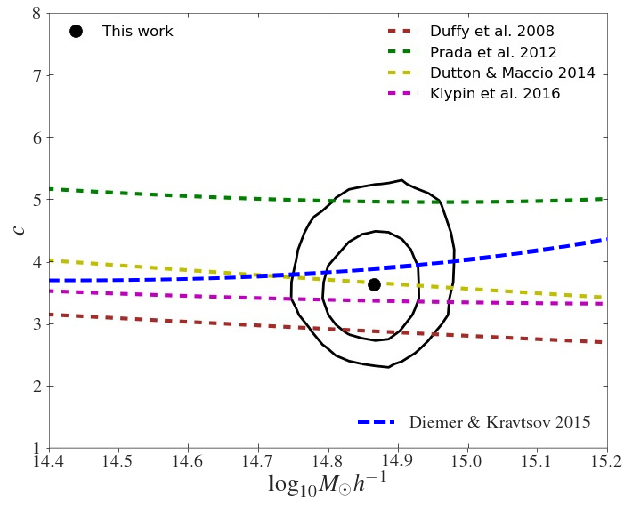

In [2]:
from scipy.misc import imread
im = imread("data/compare_simul_photoz_cropped.jpg")
plt.figure(figsize=(16,8))
# Make sure the figure axis ratio is preserved by adapting the 
# aspect ratio to the axis range
xmin, xmax, ymin, ymax = (14.4, 15.2, 1, 8)
aspect = im.shape[0] / im.shape[1] * (xmax - xmin)/(ymax - ymin)
plt.imshow(im, zorder=0, extent=[xmin, xmax, ymin, ymax], aspect=aspect)
plt.plot(np.log10(m200), c, "b--", linewidth=4, label='Diemer \& Kravtsov 2015',
        zorder=1)
plt.legend(loc='lower right', frameon=False)
plt.xlabel(r"$\log_{10}M_\odot h^{-1}$", fontsize=24)
plt.ylabel(r"$c$",fontsize=24)
plt.axis([xmin, xmax, ymin, ymax]);

It worked! The only tricky bit here was to set the aspect ratio, where we needed to know the size of the cropped image in pixels and the extent of the coordinate system. There's a bit of mismatch between coordinates left at right and top of the plot but this is certainly small enough for a quick but meaningful interpretation.

As we can see, the DK15 M-c relation is compatible with the measurements of Cibirka et al. This is not too surprising given the relatively large uncertainty of the measurement compared to the spread among the models. This is already in a regime where DK15 -- due to its upturn -- differs strongly from the still very popular Duffy et al. relation. It will be interesting to see what it takes to improves the constraints to a level that we can rule out one or the other.

<small>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">This blog post is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>. This post was written as a <a href="http://www.jupyter.org/">Jupyter Notebook</a> in Python. You can <a href="https://raw.githubusercontent.com/joergdietrich/joergdietrich.github.io/master/notebooks/Cibirka_Mc_Relation.ipynb">download</a> the original notebook.</small>